In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Importing and having a look over game data

In [2]:
# Importing game data
DataAccP06 = pd.read_excel('p06_AccData.xlsx') # reading from machine
DataAccP06.head() # showing top 5 rows


,_id,date_time,timestamp,score,acc_z,acc_y,acc_x,timestamp1
0,447,2018-07-13 09:09:34,1531469374412,14.200358,-0.864273,-0.338577,0.105988,1531469359359
1,447,2018-07-13 09:09:34,1531469374412,14.200358,-0.826904,-0.328690,0.077957,1531469359369
2,447,2018-07-13 09:09:34,1531469374412,14.200358,-0.850876,-0.315979,0.065048,1531469359380
3,447,2018-07-13 09:09:34,1531469374412,14.200358,-0.862534,-0.295441,0.061951,1531469359401
4,447,2018-07-13 09:09:34,1531469374412,14.200358,-0.898956,-0.275482,0.047897,1531469359420


In [3]:
#Preserving the modified data-frame to local machine

DataAccP06.to_excel('AccDataP6.xlsx') # A separate file created and save automatically in the same directory

In [4]:
#No. of rows and columns
DataAccP06.shape

(132174, 8)

In [5]:
#Data types containing by columns
DataAccP06.dtypes

_id                    int64
date_time     datetime64[ns]
timestamp              int64
score                float64
acc_z                float64
acc_y                float64
acc_x                float64
timestamp1             int64
dtype: object

In [6]:
# A statistical summary of the data

DataAccP06.describe()

,_id,timestamp,score,acc_z,acc_y,acc_x,timestamp1
count,132174.000000,1.321740e+05,132174.000000,132174.000000,132174.000000,132174.000000,1.321740e+05
mean,682.003859,1.532709e+12,87.641225,-0.991996,-0.007087,-0.000105,1.532709e+12
std,117.474374,7.801871e+08,13.976847,0.067044,0.109507,0.066915,7.801871e+08
min,447.000000,1.531469e+12,14.200358,-1.749451,-1.027115,-0.616028,1.531469e+12
25%,625.000000,1.532014e+12,86.851391,-1.018646,-0.049194,-0.034210,1.532014e+12
50%,677.000000,1.532682e+12,92.539058,-0.994705,0.005920,-0.000748,1.532682e+12
75%,753.000000,1.533321e+12,94.910321,-0.967529,0.053650,0.033264,1.533321e+12
max,954.000000,1.534151e+12,97.953767,-0.042648,0.493652,0.486069,1.534151e+12


In [7]:
# Checking missing values
#pd.isna(DataAccP06['acc_z']) # missing values of acc_z
#pd.isna(DataAccP06['acc_y']) # missing values of acc_z
#pd.isna(DataAccP06['acc_x']) # missing values of acc_z
pd.isna(DataAccP06['timestamp1']) # missing values of timestamp1

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
132144    False
132145    False
132146    False
132147    False
132148    False
132149    False
132150    False
132151    False
132152    False
132153    False
132154    False
132155    False
132156    False
132157    False
132158    False
132159    False
132160    False
132161    False
132162    False
132163    False
132164    False
132165    False
132166    False
132167    False
132168    False
132169    False
132170    False
132171    False
132172    False
132173    False
Name: timestamp1, Length

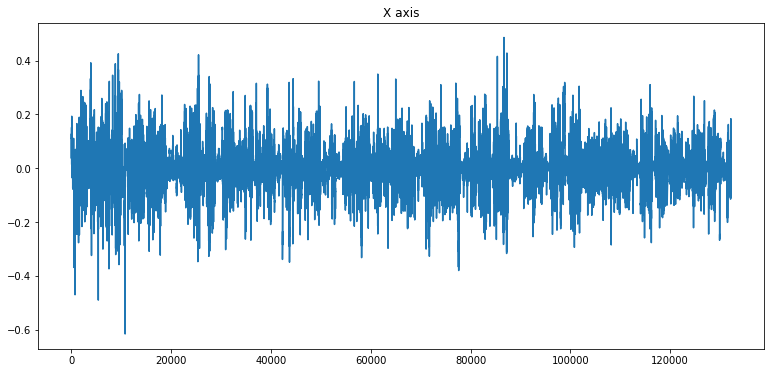

In [8]:
%matplotlib inline
fig1 = plt.figure(figsize=(13, 6))
plt.plot(DataAccP06['acc_x'])
plt.title('X axis')
plt.show()


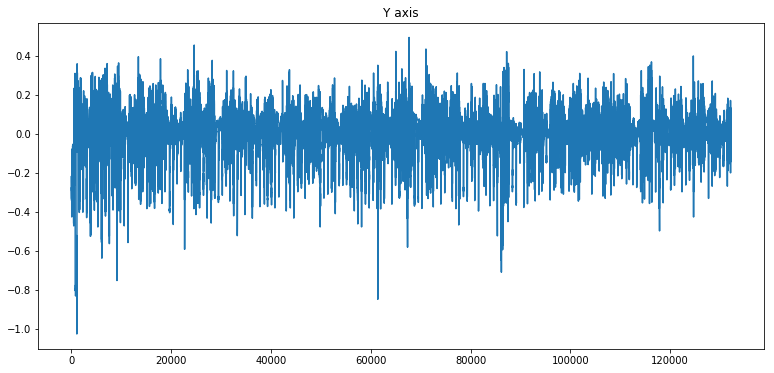

In [9]:
fig2 = plt.figure(figsize=(13, 6))
plt.plot(DataAccP06['acc_y'])
plt.title('Y axis')
plt.show()

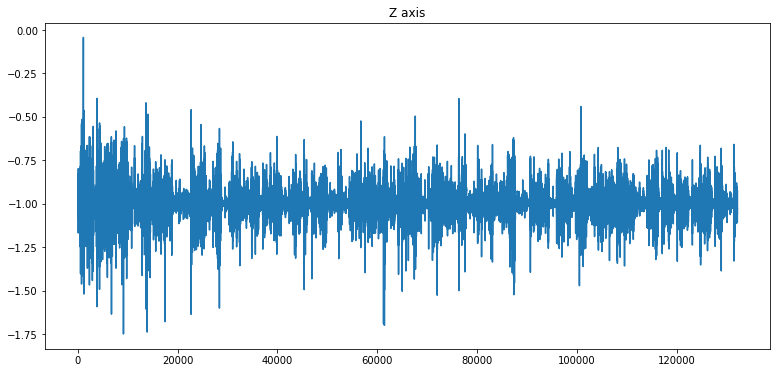

In [10]:
fig3 = plt.figure(figsize=(13, 6))
plt.plot(DataAccP06['acc_z'])
plt.title('Z axis')
plt.show()

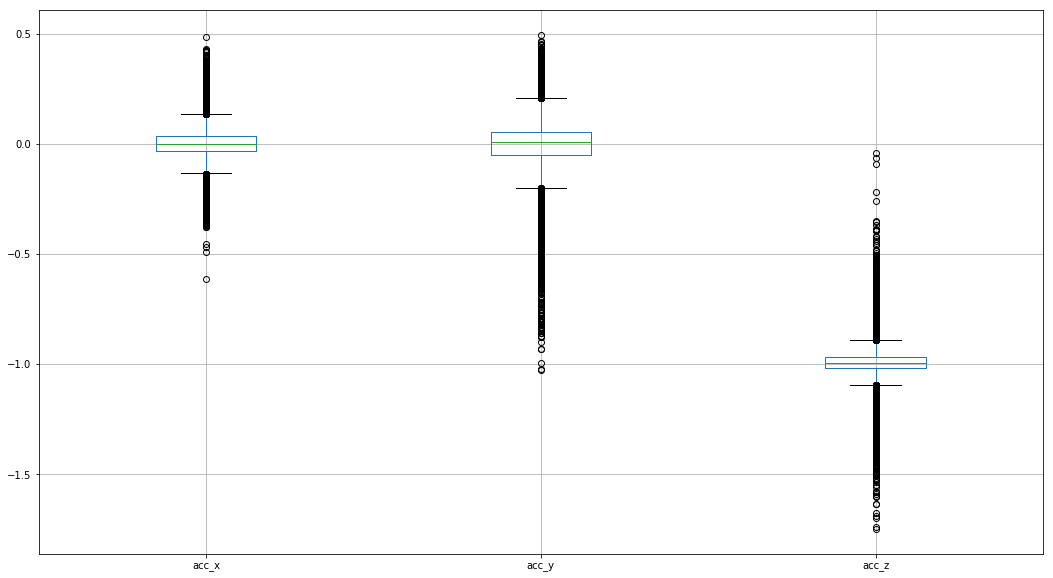

In [11]:
# Box plot of the game data 
BoxFig1 = plt.figure(figsize=(18, 10))
Boxplot = DataAccP06.boxplot(['acc_x','acc_y','acc_z',])

In [12]:
#Finding the magnitude of the axes
DataAccP06['m'] = np.sqrt(DataAccP06['acc_x']**2 + DataAccP06['acc_y']**2 + DataAccP06['acc_z']**2)
DataAccP06.head(10)

,_id,date_time,timestamp,score,acc_z,acc_y,acc_x,timestamp1,m
0,447,2018-07-13 09:09:34,1531469374412,14.200358,-0.864273,-0.338577,0.105988,1531469359359,0.934257
1,447,2018-07-13 09:09:34,1531469374412,14.200358,-0.826904,-0.328690,0.077957,1531469359369,0.893244
2,447,2018-07-13 09:09:34,1531469374412,14.200358,-0.850876,-0.315979,0.065048,1531469359380,0.909980
3,447,2018-07-13 09:09:34,1531469374412,14.200358,-0.862534,-0.295441,0.061951,1531469359401,0.913831
4,447,2018-07-13 09:09:34,1531469374412,14.200358,-0.898956,-0.275482,0.047897,1531469359420,0.941439
5,447,2018-07-13 09:09:34,1531469374412,14.200358,-0.920822,-0.245865,0.036514,1531469359440,0.953780
6,447,2018-07-13 09:09:34,1531469374412,14.200358,-0.992294,-0.226990,0.044952,1531469359460,1.018918
7,447,2018-07-13 09:09:34,1531469374412,14.200358,-1.032623,-0.217453,0.047699,1531469359480,1.056348
8,447,2018-07-13 09:09:34,1531469374412,14.200358,-1.050110,-0.226593,0.055984,1531469359500,1.075737
9,447,2018-07-13 09:09:34,1531469374412,14.200358,-1.068832,-0.243134,0.072968,1531469359520,1.098563


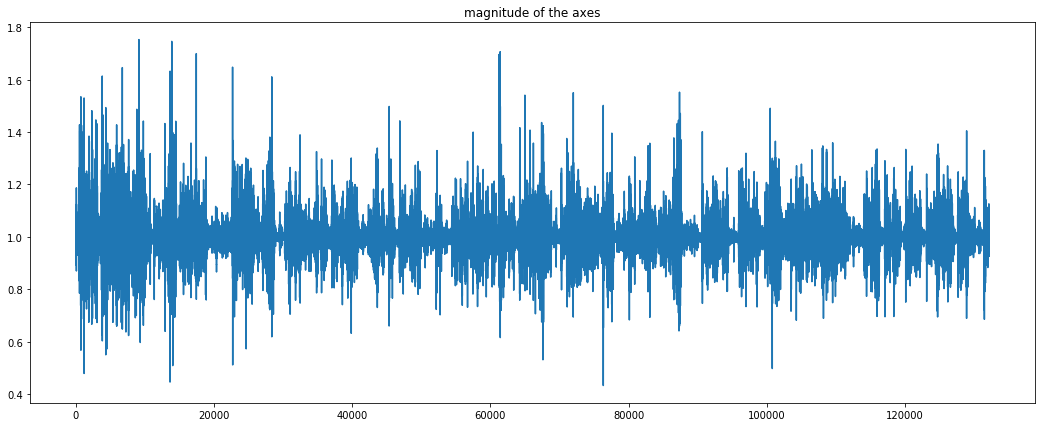

In [13]:
figm = plt.figure(figsize=(18, 7))
plt.plot(DataAccP06['m'])
plt.title('magnitude of the axes')
plt.show()

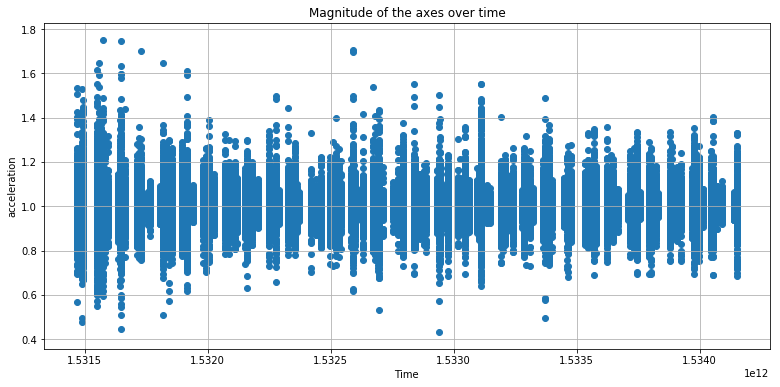

In [14]:
figx = plt.figure(figsize=(13, 6))
x = DataAccP06['timestamp']
y = DataAccP06['m']
plt.scatter(x,y)
plt.xlabel('Time')
plt.ylabel('acceleration')
plt.title('Magnitude of the axes over time')
plt.grid()
plt.show()

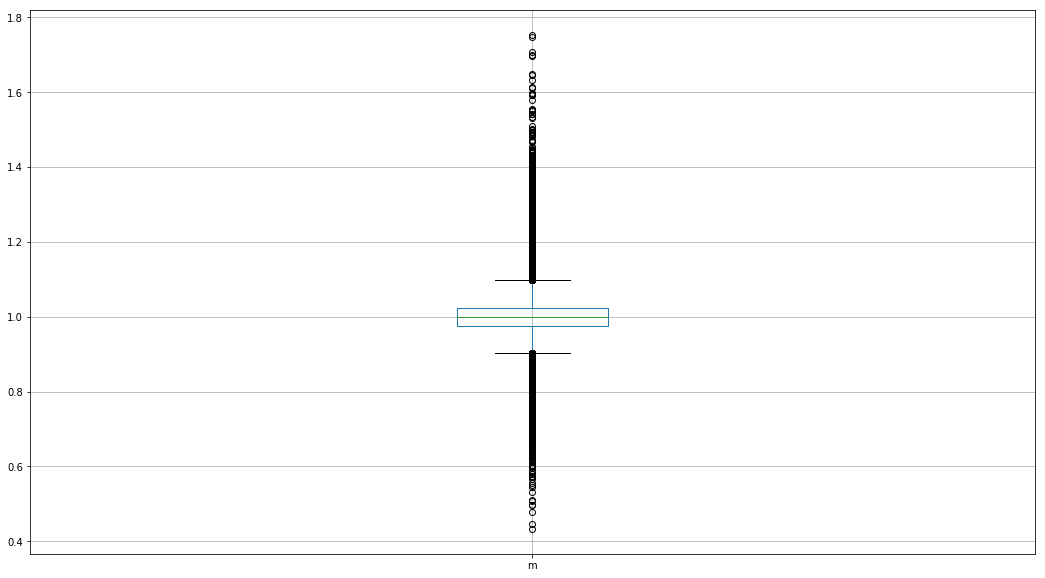

In [15]:
BoxFig1 = plt.figure(figsize=(18, 10))
Boxplot = DataAccP06.boxplot(['m'])

In [16]:
# Importing medication data
MedicationDataP06 = pd.read_excel('MedicationP6.xlsx')
MedicationDataP06.head(10)

,X_id,date_time,timestamp,double_medication,device_id,intake_time
0,149,2018-07-13 09:12:03,1.531470e+12,1531461626000,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-13 07:00:26
1,150,2018-07-13 09:20:41,1.531470e+12,1531461617000,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-13 07:00:17
2,151,2018-07-13 09:43:02,1.531471e+12,1531471382129,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-13 09:43:02
3,152,2018-07-13 15:23:12,1.531492e+12,1531488650000,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-13 14:30:50
4,160,2018-07-14 07:32:10,1.531550e+12,1531549930335,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-14 07:32:10
5,161,2018-07-14 07:33:05,1.531550e+12,1531548053000,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-14 07:00:53
6,164,2018-07-14 09:33:23,1.531557e+12,1531557203171,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-14 09:33:23
7,167,2018-07-14 11:31:04,1.531564e+12,1531564264113,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-14 11:31:04
8,168,2018-07-14 12:02:00,1.531566e+12,1531566120350,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-14 12:02:00
9,170,2018-07-14 14:29:21,1.531575e+12,1531574961902,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-14 14:29:21


In [17]:
MedicationDataP06

,X_id,date_time,timestamp,double_medication,device_id,intake_time
0,149,2018-07-13 09:12:03,1.531470e+12,1531461626000,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-13 07:00:26
1,150,2018-07-13 09:20:41,1.531470e+12,1531461617000,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-13 07:00:17
2,151,2018-07-13 09:43:02,1.531471e+12,1531471382129,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-13 09:43:02
3,152,2018-07-13 15:23:12,1.531492e+12,1531488650000,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-13 14:30:50
4,160,2018-07-14 07:32:10,1.531550e+12,1531549930335,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-14 07:32:10
5,161,2018-07-14 07:33:05,1.531550e+12,1531548053000,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-14 07:00:53
6,164,2018-07-14 09:33:23,1.531557e+12,1531557203171,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-14 09:33:23
7,167,2018-07-14 11:31:04,1.531564e+12,1531564264113,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-14 11:31:04
8,168,2018-07-14 12:02:00,1.531566e+12,1531566120350,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-14 12:02:00
9,170,2018-07-14 14:29:21,1.531575e+12,1531574961902,e2e8a376-9dbb-4b87-9c4d-30ff11d7f22c,2018-07-14 14:29:21


In [18]:
a = 1531471382129
b = 1531469374412
if b > a:
    print('b is greater than a')
else:
    print('a is larger than b')

a is larger than b


In [19]:
#IS EQUAL TO Select all of the records in the timestamp column WHERE [The _id column is equal to 'x']
DataAccP06['timestamp'][DataAccP06['_id'] == DataAccP06['_id'].max()]

131419    1534150732078
131420    1534150732078
131421    1534150732078
131422    1534150732078
131423    1534150732078
131424    1534150732078
131425    1534150732078
131426    1534150732078
131427    1534150732078
131428    1534150732078
131429    1534150732078
131430    1534150732078
131431    1534150732078
131432    1534150732078
131433    1534150732078
131434    1534150732078
131435    1534150732078
131436    1534150732078
131437    1534150732078
131438    1534150732078
131439    1534150732078
131440    1534150732078
131441    1534150732078
131442    1534150732078
131443    1534150732078
131444    1534150732078
131445    1534150732078
131446    1534150732078
131447    1534150732078
131448    1534150732078
              ...      
132144    1534150732078
132145    1534150732078
132146    1534150732078
132147    1534150732078
132148    1534150732078
132149    1534150732078
132150    1534150732078
132151    1534150732078
132152    1534150732078
132153    1534150732078
132154    153415

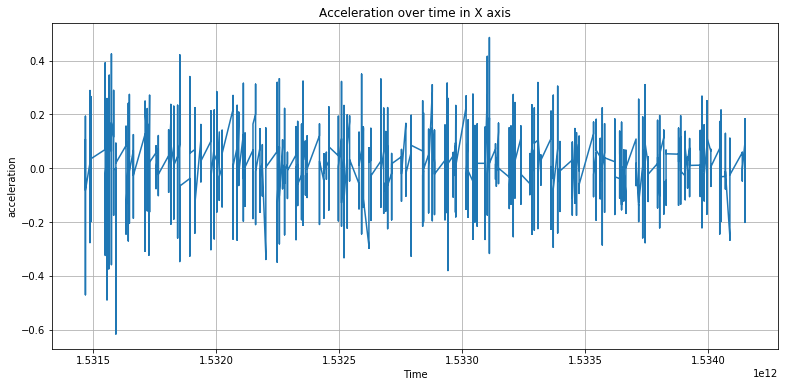

In [20]:
figx = plt.figure(figsize=(13, 6))
x = DataAccP06['timestamp']
y = DataAccP06['acc_x']
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('acceleration')
plt.title('Acceleration over time in X axis')
plt.grid()
plt.show()

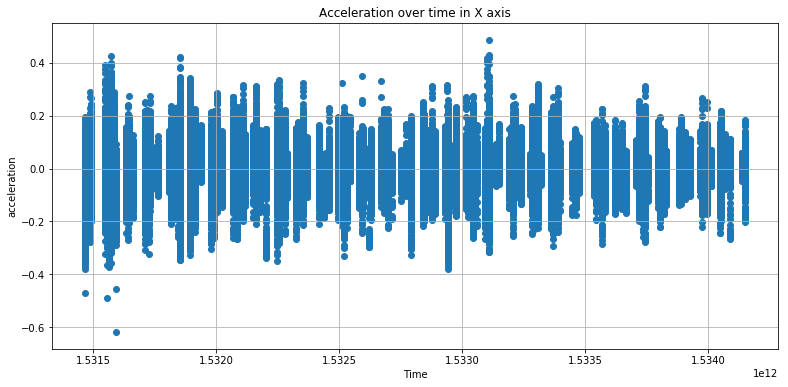

In [21]:
figx = plt.figure(figsize=(13, 6))
x = DataAccP06['timestamp']
y = DataAccP06['acc_x']
plt.scatter(x,y)
plt.xlabel('Time')
plt.ylabel('acceleration')
plt.title('Acceleration over time in X axis')
plt.grid()
plt.show()

In [22]:
for item in DataAccP06['_id']:
    print(item)
    item = set(item)

447


TypeError: 'int' object is not iterable

In [ ]:
'_id'

In [24]:
print(type(DataAccP06['_id']))

<class 'pandas.core.series.Series'>


In [25]:
uniq_id = set(DataAccP06['_id']) # using set we can find the uniqueness of the data

In [26]:
print(uniq_id)

{520, 535, 536, 540, 545, 546, 562, 565, 566, 580, 581, 585, 592, 602, 607, 608, 615, 616, 617, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 640, 641, 642, 643, 644, 645, 648, 649, 650, 651, 652, 653, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 676, 677, 678, 679, 680, 682, 685, 686, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 717, 718, 727, 731, 739, 741, 742, 744, 746, 750, 751, 753, 755, 758, 761, 763, 766, 769, 771, 773, 778, 780, 784, 785, 787, 792, 801, 803, 808, 811, 815, 817, 825, 826, 831, 834, 836, 847, 850, 856, 859, 865, 871, 875, 894, 898, 904, 908, 916, 921, 922, 927, 939, 952, 954, 447, 448, 449, 450, 451, 452, 453, 459, 460, 466, 467, 471, 472, 478, 484, 497, 498, 504, 505}


In [27]:
print(len(uniq_id))

175


In [ ]:
DataAccP06.head()

In [ ]:
sorted_uniqID = sorted(uniq_id)
print(sorted_uniqID)

In [ ]:
DataAccP06.head(10)

In [ ]:
print(DataAccP06['_id'][::756])

In [29]:
uniqID = DataAccP06['_id'].unique()
uniqID

array([447, 448, 449, 450, 451, 452, 453, 459, 460, 466, 467, 471, 472,
       478, 484, 497, 498, 504, 505, 520, 535, 536, 540, 545, 546, 562,
       565, 566, 580, 581, 585, 592, 602, 607, 608, 615, 616, 617, 620,
       621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633,
       634, 635, 636, 637, 638, 640, 641, 642, 643, 644, 645, 648, 649,
       650, 651, 652, 653, 656, 657, 658, 659, 660, 661, 662, 663, 664,
       665, 666, 667, 668, 669, 670, 671, 672, 676, 677, 678, 679, 680,
       682, 685, 686, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698,
       699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711,
       712, 713, 714, 717, 718, 727, 731, 739, 741, 742, 744, 746, 750,
       751, 753, 755, 758, 761, 763, 766, 769, 771, 773, 778, 780, 784,
       785, 787, 792, 801, 803, 808, 811, 815, 817, 825, 826, 831, 834,
       836, 847, 850, 856, 859, 865, 871, 875, 894, 898, 904, 908, 916,
       921, 922, 927, 939, 952, 954], dtype=int64)

In [30]:
print(len(uniqID))

175


In [ ]:
print(df['Names'].describe())

In [ ]:
print(DataAccP06['_id'].describe())

In [ ]:
ids = DataAccP06.groupby('_id')
ids

In [ ]:
df = ids.sum()
df